In [159]:

#Used for storing and playing with data using DataFrame.
import pandas as pd
#Used for working with arrays in python.
import numpy as np
#Used for plotting graphs from data.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
!pip install geopandas
import plotly.express as px
import geopandas as gpd
#Used for creating ML models.
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import plot_tree
#used for train test splitting
from sklearn.model_selection import train_test_split
#Distrubation test
import scipy
from scipy.stats import skew, kurtosis, shapiro, jarque_bera
#Normalization 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# Read csv data
data = pd.read_csv('RIA02.20230502T160508.csv')
#For Europe map and Anova analysis
world_data=pd.read_excel("prc_colc_rents_page_spreadsheet.xlsx")
#alpha_code=pd.read_excel("Alpha_codes.xlsx")
#Anova Test
from scipy.stats import f_oneway
#Kruskal wallis Test
from scipy.stats import kruskal
#Mann Whitney U test
from scipy.stats import mannwhitneyu




### Number of Bedrooms
One bed :1
Two bed : 2
Three bed : 3
Four plus bed: 4 

### Property Type
Other flats: 1
Apartment: 2
Terrace house : 3
Semi detached house: 4
Detached house : 5

In [160]:
#DAta Overview
data.head(10)

,STATISTIC Label,Year,Number of Bedrooms,Property Type,Location,UNIT,VALUE
0,RTB Average Monthly Rent Report,2008,All bedrooms,All property types,Carlow,Euro,747.97
1,RTB Average Monthly Rent Report,2008,All bedrooms,All property types,Carlow Town,Euro,811.72
2,RTB Average Monthly Rent Report,2008,All bedrooms,All property types,"Graiguecullen, Carlow",Euro,711.35
3,RTB Average Monthly Rent Report,2008,All bedrooms,All property types,"Tullow, Carlow",Euro,717.59
4,RTB Average Monthly Rent Report,2008,All bedrooms,All property types,Cavan,Euro,571.63
5,RTB Average Monthly Rent Report,2008,All bedrooms,All property types,Cavan Town,Euro,598.44
6,RTB Average Monthly Rent Report,2008,All bedrooms,All property types,"Bailieborough, Cavan",Euro,NaN
7,RTB Average Monthly Rent Report,2008,All bedrooms,All property types,"Ballyconnell, Cavan",Euro,598.74
8,RTB Average Monthly Rent Report,2008,All bedrooms,All property types,"Ballyjamesduff, Cavan",Euro,598.45
9,RTB Average Monthly Rent Report,2008,All bedrooms,All property types,"Belturbet, Cavan",Euro,481.83


In [161]:
data.columns

Index(['STATISTIC Label', 'Year', 'Number of Bedrooms', 'Property Type',
       'Location', 'UNIT', 'VALUE'],
      dtype='object')

In [162]:
# Detect null observation number and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262248 entries, 0 to 262247
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STATISTIC Label     262248 non-null  object 
 1   Year                262248 non-null  int64  
 2   Number of Bedrooms  262248 non-null  object 
 3   Property Type       262248 non-null  object 
 4   Location            262248 non-null  object 
 5   UNIT                262248 non-null  object 
 6   VALUE               94804 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 14.0+ MB


In [163]:
#Overview for Numeric Variables 
# The data between 2008 to 2021 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,262248.0,2014.500000,4.031137,2008.00,2011.0000,2014.50,2018.0000,2021.00
VALUE,94804.0,970.516455,455.714281,233.67,622.5075,867.67,1204.7425,6385.74


In [164]:
# Word Compare 
#Ireland is among the top 5 countries in terms of per capita income.
#That is why I chose to make the comparison between the capitals of these countries. 

In [165]:
## World Renting Visulation 
# it is to understand  both difference and similarity between  Europe Capitals Home Rents and  Dublin  

In [166]:
#Alpha code to print europe map
country_codes = pd.read_csv("country_codes.tsv", sep='\t')
country_codes.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20


In [167]:
#to check word data ( the dataset just for compare the countries also for word visualization)
world_data.head()

,Country,TIME,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,Bruxelles/Brussel,1400,1400,1350,1450,1350,1400,1450,1450,1600,1800
1,Czechia,Praha,1350,1250,1350,1300,1550,1700,1800,1750,1600,1800
2,Denmark,København,2200,2100,2400,2400,2550,2600,2650,2650,2650,2600
3,Germany,Berlin,1350,1450,1450,1600,1650,1750,1850,1900,1900,1950
4,Estonia,Tallinn,980,1050,1150,1100,1200,1250,1300,1150,1300,1650


In [168]:
#drop unnecessery columns
world_data.drop("TIME", axis=1,inplace=True)
world_data

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,1400,1400,1350,1450,1350,1400,1450,1450,1600,1800
1,Czechia,1350,1250,1350,1300,1550,1700,1800,1750,1600,1800
2,Denmark,2200,2100,2400,2400,2550,2600,2650,2650,2650,2600
3,Germany,1350,1450,1450,1600,1650,1750,1850,1900,1900,1950
4,Estonia,980,1050,1150,1100,1200,1250,1300,1150,1300,1650
5,Ireland,1600,1950,2100,2150,2350,2650,2800,2800,2700,3150
6,Greece,1350,1250,1250,1250,1400,1450,1600,1600,1700,1900
7,Spain,1600,1600,1650,1700,2000,2150,2150,2200,2100,2500
8,France,2300,2400,2500,2650,2700,2750,2700,2700,2650,2700
9,Croatia,1050,1250,1250,1350,1300,1550,1550,1600,1700,1950


In [169]:
#relocation of rows and columns to make them suitable for testing
world_data_anova=world_data.transpose()
world_data_anova = world_data_anova.rename(columns=world_data_anova.iloc[0]).drop(world_data_anova.index[0])
world_data_anova.head()

,Belgium,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,Croatia,...,Slovakia,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom of Great Britain and Northern Ireland (the),Montenegro,Serbia,Turkey
2013,1400,1350,2200,1350,980,1600,1350,1600,2300,1050,...,1250,2200,2450,1350,2650,2200,3800,1000,1700,680
2014,1400,1250,2100,1450,1050,1950,1250,1600,2400,1250,...,1300,2050,2450,1550,2600,2300,4000,1100,1500,690
2015,1350,1350,2400,1450,1150,2100,1250,1650,2500,1250,...,1250,2000,2650,1650,2450,2950,4750,1050,1550,650
2016,1450,1300,2400,1600,1100,2150,1250,1700,2650,1350,...,1300,2100,2650,2050,2400,2700,4100,1150,1400,670
2017,1350,1550,2550,1650,1200,2350,1400,2000,2700,1300,...,1250,2000,2750,2450,2550,2500,4000,1150,1650,600


In [170]:
#Top 5 contry ( GDP per capita)
filtered_df = world_data_anova[['Denmark','Ireland','Norway', 'Switzerland','Luxembourg']]
filtered_df.head()

,Denmark,Ireland,Norway,Switzerland,Luxembourg
2013,2200,1600,2650,2200,2250
2014,2100,1950,2600,2300,2350
2015,2400,2100,2450,2950,2950
2016,2400,2150,2400,2700,3300
2017,2550,2350,2550,2500,3050


In [171]:
#Normalization TEst 
#I applied Shapiro Wilk because I have just 20 rows. This test is more reliable on the small dataset
for column in filtered_df.columns:
    stat, p_value = shapiro(filtered_df[column])
    print(f"City {column}: Sattictic={stat:.4f}, p değeri={p_value:.4f}")

City Denmark: Sattictic=0.8305, p değeri=0.0339
City Ireland: Sattictic=0.9652, p değeri=0.8433
City Norway: Sattictic=0.9239, p değeri=0.3903
City Switzerland: Sattictic=0.9688, p değeri=0.8792
City Luxembourg: Sattictic=0.8249, p değeri=0.0290


In [172]:
#Denmark and Luxembourg have normal distribution
#IRelan Norway and Switzerland doesnt have normal distrubution

In [173]:
#I used a one-way ANOVA because I compared 5 different countries and the values changed over time.
# ANOVA testi for series that have normal distrubation 
anova_result = f_oneway(world_data_anova['Ireland'], world_data_anova['Luxembourg'], 
                        world_data_anova['Denmark'], world_data_anova['Switzerland'], 
                        world_data_anova['Norway'])

print("ANOVA Test Result:")
print("F statisctic:", anova_result.statistic)
print("p value :", anova_result.pvalue)

ANOVA Test Result:
F statisctic: 7.101527515175639
p value : 0.00016046711618417282


In [174]:
# Conclusion: p value < 0.05  H0 can not acceptable , at least one series is different from the others

In [175]:


#I used this test because it did not satisfy the normality assumption of some columns. 
# Kruskal-Wallis testi
test_stat, p_value = kruskal(*filtered_df.values.T)

# Sonuçları yazdırma
print("Kruskal-Wallis Test Result :")
print("Test statistic:", test_stat)
print("p value:", p_value)

Kruskal-Wallis Test Result :
Test statistic: 11.085621355948534
p value: 0.025618415322866305


In [176]:
filtered_df = filtered_df.astype(float)

In [177]:
#Mann Whitney U

columns = ['Denmark','Ireland','Norway', 'Switzerland','Luxembourg']
for i, col in enumerate(columns):
    stat, p_value = mannwhitneyu(filtered_df['Ireland'], filtered_df[col])
    print(f" {col}: U statistic={stat:.4f}, p value={p_value:.4f}")

 Denmark: U statistic=52.0000, p value=0.9092
 Ireland: U statistic=50.0000, p value=1.0000
 Norway: U statistic=44.5000, p value=0.7047
 Switzerland: U statistic=43.5000, p value=0.6494
 Luxembourg: U statistic=13.5000, p value=0.0064


### As a result, there is no statistically significant difference between Ireland and Denmark, Ireland, Norway and Switzerland columns. However, it can be said that there is a statistically significant difference between the Luxembourg column and Ireland. These interpretations are based on p-values at the 0.05 significance level.
### I deliberately put the data for Ireland in because I wanted to check if the test result would come  as 1. so that I could be sure that the test was reliable.

In [178]:
#Getting the data into the correct format for visualization
melted_data = pd.melt(world_data, id_vars='Country', var_name='Year', value_name='Rentt')
melted_data

,Country,Year,Rentt
0,Belgium,2013,1400
1,Czechia,2013,1350
2,Denmark,2013,2200
3,Germany,2013,1350
4,Estonia,2013,980
...,...,...,...
315,Switzerland,2022,2800
316,United Kingdom of Great Britain and Northern I...,2022,4250
317,Montenegro,2022,1050
318,Serbia,2022,2100


In [179]:
#Merge with alpha code
merged_data = melted_data.merge(country_codes, left_on='Country', right_on='Country', how='left')
merged_data

,Country,Year,Rentt,Alpha-2 code,Alpha-3 code,Numeric
0,Belgium,2013,1400,BE,BEL,56
1,Czechia,2013,1350,CZ,CZE,203
2,Denmark,2013,2200,DK,DNK,208
3,Germany,2013,1350,DE,DEU,276
4,Estonia,2013,980,EE,EST,233
...,...,...,...,...,...,...
315,Switzerland,2022,2800,CH,CHE,756
316,United Kingdom of Great Britain and Northern I...,2022,4250,GB,GBR,826
317,Montenegro,2022,1050,ME,MNE,499
318,Serbia,2022,2100,RS,SRB,688


In [180]:
#when we compare the European Capital's Rent Price , Ireland one od the most expensive country in the Europe.
# That's why I investigate  Dublin Rent Prices in this assignment

fig = px.choropleth(merged_data, 
                    locations="Alpha-3 code",
                    color="Rentt", 
                    hover_name="Country", 
                    # column to add to hover information
                    animation_frame="Year", 
                    # column on which to animate
                    color_continuous_scale=px.colors.sequential.Plasma )
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'REnt of Europe Capital Cities',
    # set projection style for the plot
    geo_scope = 'europe' 

)
fig.show()

# Data Cleaning

In [181]:
# Drop rows which doesnt have rent price information
data.dropna(subset=["VALUE"],inplace=True)

In [182]:
#Drop first and fifth row
data=data.iloc[:,[1,2,3,4,6]]

In [184]:
#To check the code
data.head()

,Year,Number of Bedrooms,Property Type,Location,VALUE
0,2008,All bedrooms,All property types,Carlow,747.97
1,2008,All bedrooms,All property types,Carlow Town,811.72
2,2008,All bedrooms,All property types,"Graiguecullen, Carlow",711.35
3,2008,All bedrooms,All property types,"Tullow, Carlow",717.59
4,2008,All bedrooms,All property types,Cavan,571.63


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94804 entries, 0 to 261873
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                94804 non-null  int64  
 1   Number of Bedrooms  94804 non-null  object 
 2   Property Type       94804 non-null  object 
 3   Location            94804 non-null  object 
 4   VALUE               94804 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.3+ MB


In [190]:
country_data = data[(data["Number of Bedrooms"] == "All bedrooms") & (data["Property Type"] == "All property types") & (data["Location"] == "Dublin")]


In [191]:
country_data.head()

,Year,Number of Bedrooms,Property Type,Location,VALUE
71,2008,All bedrooms,All property types,Dublin,1270.17
18803,2009,All bedrooms,All property types,Dublin,1157.52
37535,2010,All bedrooms,All property types,Dublin,1041.02
56267,2011,All bedrooms,All property types,Dublin,1009.14
74999,2012,All bedrooms,All property types,Dublin,1024.05


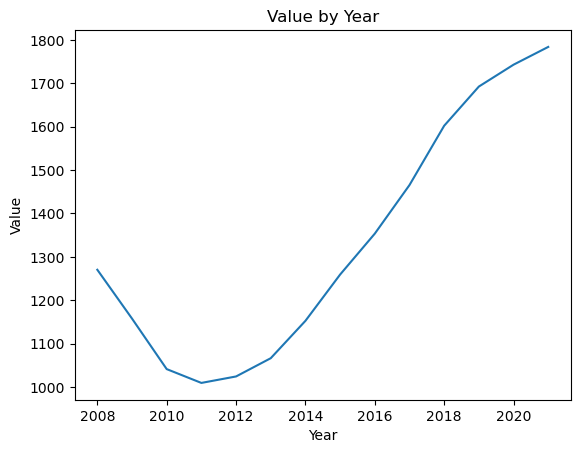

In [192]:
#Plot of Rent by Year
plt.plot(country_data["Year"], country_data["VALUE"])
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Value by Year")
plt.show()

In [28]:
#Cleaning unneccesary columns We analize the houses by Property types and Number of bedrooms
data=data.loc[ (data["Number of Bedrooms"].isin(["One bed","Two bed","Three bed","Four plus bed"]))
              & (data["Property Type"] != "All property types")]



In [29]:
#To get information just about Dublin
dub_data=data[data["Location"].str.contains("Dublin")]

In [30]:
#To check locations
locations = sorted(dub_data['Location'].unique())
locations

['Arbour Hill, Dublin 7',
 'Artane, Dublin 5',
 'Ashtown, Dublin 15',
 'Aungier Street, Dublin 2',
 'Balbriggan, Dublin',
 'Baldoyle, Dublin 13',
 'Balgriffin, Dublin 13',
 'Ballinteer, Dublin 16',
 'Ballsbridge, Dublin 4',
 'Ballycullen, Dublin 24',
 'Ballyfermot, Dublin 10',
 'Ballymun, Dublin 11',
 'Ballymun, Dublin 9',
 'Beaumont, Dublin 9',
 'Blackrock, Dublin',
 'Blanchardstown, Dublin 15',
 'Booterstown, Dublin',
 'Cabinteely, Dublin 18',
 'Cabra, Dublin 7',
 'Carpenterstown, Dublin 15',
 'Carrickmines, Dublin 18',
 'Castleknock, Dublin 15',
 'Chapelizod, Dublin 20',
 'Charlemont Street, Dublin 2',
 'Cherry Orchard, Dublin 10',
 'Christchurch, Dublin 8',
 'Churchtown, Dublin 14',
 'Citywest, Dublin 24',
 'Clondalkin, Dublin 22',
 'Clonee, Dublin 15',
 'Clongriffin, Dublin 13',
 'Clonliffe, Dublin 3',
 'Clonsilla, Dublin 15',
 'Clonskeagh, Dublin 14',
 'Clontarf, Dublin 3',
 'Coolmine, Dublin 15',
 'Cork Street, Dublin 8',
 'Crumlin, Dublin 12',
 'Dalkey, Dublin',
 'Dartry, Dubli

In [31]:
# this analays based on Dublin areas ( Dublin 22 has any unique information so Dublin 22 Clondalkin is used for Dublin 22 area. 
#Dublin 22 consist of Clondalkin, Liffey Valley, Newcastle and Neilstown)

In [32]:
dub_data=dub_data.loc[dub_data["Location"].isin(["Dublin 1","Dublin 2","Dublin 3","Dublin 4",
                           "Dublin 5","Dublin 6","Dublin 6W","Dublin 7","Dublin 8",
                           "Dublin 9","Dublin 10","Dublin 11","Dublin 12",
                           "Dublin 13","Dublin 14","Dublin 15","Dublin 16"
                           ,"Dublin 17","Dublin 18","Dublin 20","Dublin 22","Dublin 24","Dun Laoghaire, Dublin"
                          ,"Blackrock, Dublin","Swords, Dublin","Malahide, Dublin","Balbriggan, Dublin","Clondalkin, Dublin 22"])]

In [33]:
dub_data=dub_data.reset_index(drop=True)

In [34]:
# To learn any null values and 3324 rows
dub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324 entries, 0 to 3323
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                3324 non-null   int64  
 1   Number of Bedrooms  3324 non-null   object 
 2   Property Type       3324 non-null   object 
 3   Location            3324 non-null   object 
 4   VALUE               3324 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 130.0+ KB


In [35]:
#To know how many unique values has each collumns
for collumnss in ["Year","Number of Bedrooms","Property Type"]:
    print(collumnss)
    print(dub_data[collumnss].value_counts())

Year
2009    260
2010    260
2016    257
2011    256
2013    255
2014    253
2015    253
2012    250
2017    244
2018    244
2020    237
2019    236
2008    229
2021     90
Name: Year, dtype: int64
Number of Bedrooms
Three bed        1073
Two bed          1022
One bed           624
Four plus bed     605
Name: Number of Bedrooms, dtype: int64
Property Type
Apartment              1103
Terrace house           911
Semi detached house     825
Other flats             302
Detached house          183
Name: Property Type, dtype: int64


In [36]:
#To detect any duplicated rows
duplicate=dub_data.duplicated()
print("Count of Dublicated rows :" ,duplicate.sum())


Count of Dublicated rows : 0


In [37]:
#to detecet outliers

Text(0.5, 1.0, 'Box plot of VALUE')

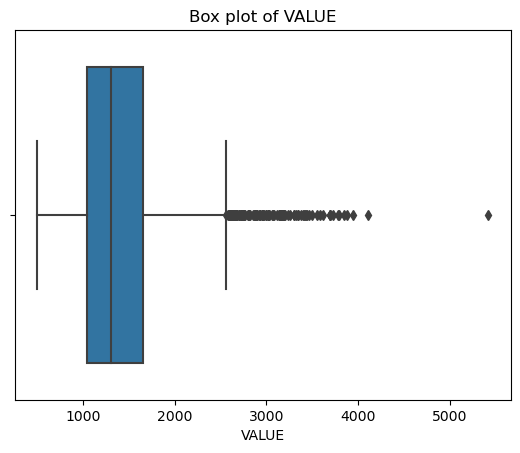

In [38]:
sns.boxplot(x=dub_data["VALUE"])
plt.title("Box plot of VALUE")


Text(0.5, 1.0, 'Box plot of VALUE by YEAR')

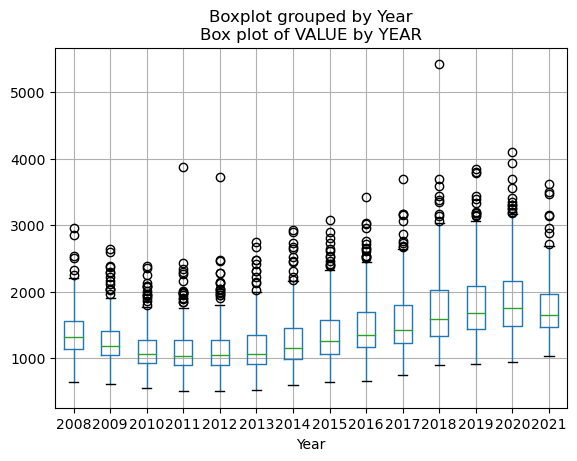

In [39]:
dub_data.boxplot(column="VALUE",by="Year")
plt.title("Box plot of VALUE by YEAR")

In [40]:
#Outliers
# 1st quartile
q1 = np.percentile(dub_data["VALUE"],25)
# 3rd quartile
q3 = np.percentile(dub_data["VALUE"],75)
  # IQR
IQR = q3 - q1
# Outlier step
outlier_step = IQR * 1.5
# detect outlier and
    # store 
outliers = dub_data[(dub_data["VALUE"] < q1 - outlier_step) | (dub_data["VALUE"] > q3 + outlier_step)]
print(outliers.head(20))

      Year Number of Bedrooms        Property Type           Location    VALUE
190   2008      Four plus bed       Detached house           Dublin 4  2853.89
200   2008      Four plus bed  Semi detached house           Dublin 4  2963.38
443   2009      Four plus bed       Detached house           Dublin 4  2635.90
455   2009      Four plus bed  Semi detached house           Dublin 4  2599.62
1001  2011      Four plus bed            Apartment           Dublin 1  3874.91
1251  2012      Four plus bed            Apartment           Dublin 1  3720.11
1463  2013      Four plus bed       Detached house           Dublin 4  2668.67
1507  2013      Four plus bed            Apartment           Dublin 1  2741.49
1713  2014      Four plus bed       Detached house   Malahide, Dublin  2723.40
1714  2014      Four plus bed       Detached house           Dublin 4  2923.75
1725  2014      Four plus bed  Semi detached house           Dublin 4  2676.56
1745  2014      Four plus bed        Terrace house  

In [41]:
#Distrubution of outliers
outliers["Location"].value_counts().head(50)

Dublin 4                 40
Dublin 6                 16
Blackrock, Dublin        12
Malahide, Dublin         11
Dun Laoghaire, Dublin     9
Dublin 14                 8
Dublin 18                 7
Dublin 1                  6
Dublin 2                  6
Dublin 6W                 4
Dublin 3                  3
Dublin 13                 2
Dublin 16                 2
Dublin 8                  1
Name: Location, dtype: int64

In [42]:
#Distrubution of outliers
dub_data["Number of Bedrooms"].value_counts().head(50)

Three bed        1073
Two bed          1022
One bed           624
Four plus bed     605
Name: Number of Bedrooms, dtype: int64

In [43]:
var=['Year', 'Number of Bedrooms', 'Property Type', 'Location',]
def plot_hist(var):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=var,data=outliers)
    
   
    plt.show()

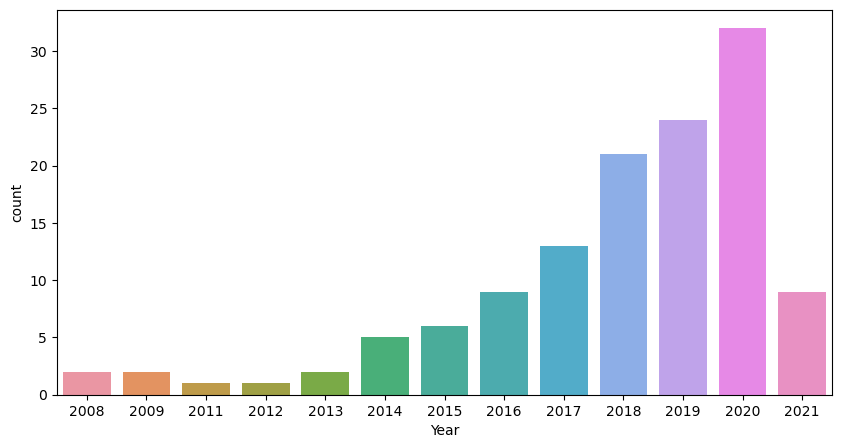

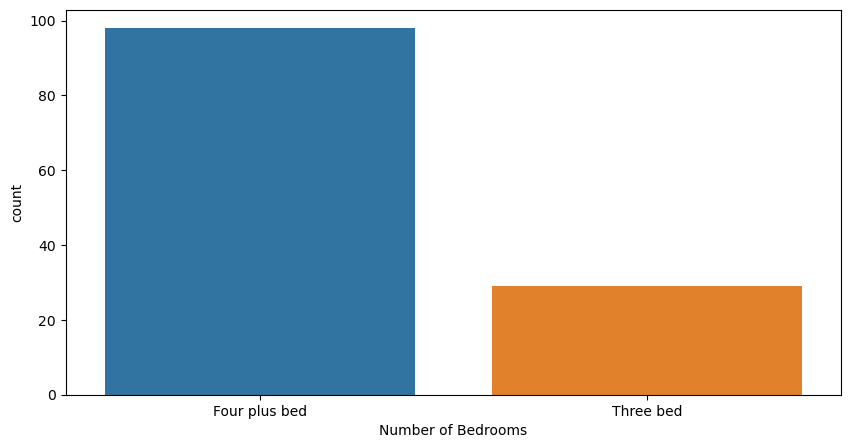

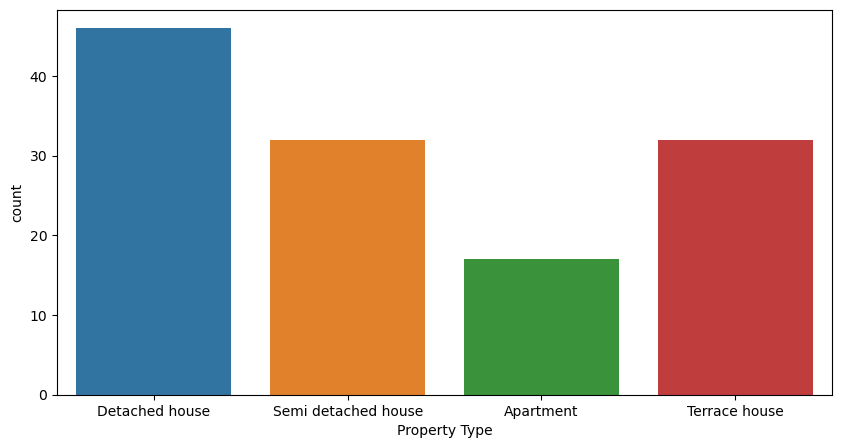

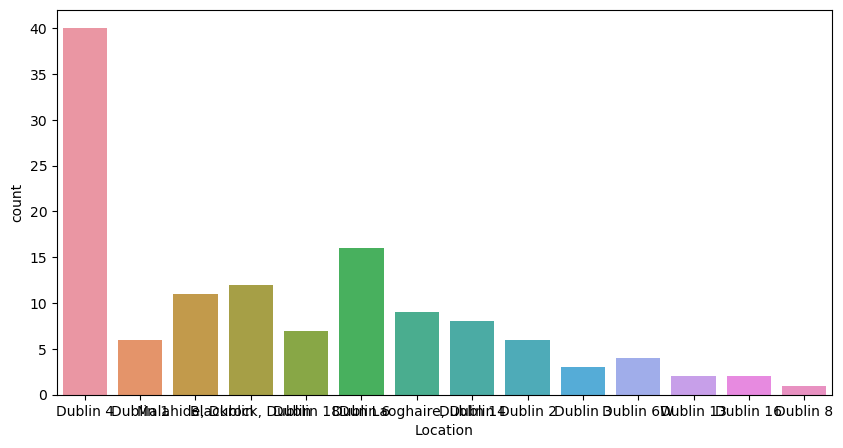

In [44]:
for n in var :
    plot_hist(n)

In [45]:
#127 rows
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 190 to 3323
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                127 non-null    int64  
 1   Number of Bedrooms  127 non-null    object 
 2   Property Type       127 non-null    object 
 3   Location            127 non-null    object 
 4   VALUE               127 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.0+ KB


In [46]:
#outliar percantege ( outliers/full data) %3 
print(127/3324)

0.038206979542719614


In [47]:
#percentage of outliers by Number of Bedrooms
x=dub_data["Number of Bedrooms"].value_counts()
y=outliers["Number of Bedrooms"].value_counts()
percentage=y/x
percentage.sort_values(ascending=False)

Four plus bed    0.161983
Three bed        0.027027
One bed               NaN
Two bed               NaN
Name: Number of Bedrooms, dtype: float64

In [48]:
#percentage of outliers by location
x=dub_data["Location"].value_counts()
y=outliers["Location"].value_counts()
percentage=y/x
percentage.sort_values(ascending=False)

Dublin 4                 0.204082
Malahide, Dublin         0.107843
Blackrock, Dublin        0.098361
Dun Laoghaire, Dublin    0.096774
Dublin 6                 0.079602
Dublin 2                 0.064516
Dublin 14                0.059701
Dublin 18                0.058824
Dublin 1                 0.050847
Dublin 6W                0.031008
Dublin 16                0.019048
Dublin 3                 0.018405
Dublin 13                0.016667
Dublin 8                 0.006024
Balbriggan, Dublin            NaN
Clondalkin, Dublin 22         NaN
Dublin 10                     NaN
Dublin 11                     NaN
Dublin 12                     NaN
Dublin 15                     NaN
Dublin 17                     NaN
Dublin 20                     NaN
Dublin 24                     NaN
Dublin 5                      NaN
Dublin 7                      NaN
Dublin 9                      NaN
Swords, Dublin                NaN
Name: Location, dtype: float64

In [49]:
##percentage of outliers by Property Type
x=dub_data["Property Type"].value_counts()
y=outliers["Property Type"].value_counts()
percentage=y/x
percentage.sort_values(ascending=False)

Detached house         0.251366
Semi detached house    0.038788
Terrace house          0.035126
Apartment              0.015413
Other flats                 NaN
Name: Property Type, dtype: float64

In [50]:
##percentage of outliers by Year
x=dub_data["Year"].value_counts()
y=outliers["Year"].value_counts()
percentage=y/x
percentage.sort_values(ascending=False)

2020    0.135021
2019    0.101695
2021    0.100000
2018    0.086066
2017    0.053279
2016    0.035019
2015    0.023715
2014    0.019763
2008    0.008734
2013    0.007843
2009    0.007692
2012    0.004000
2011    0.003906
2010         NaN
Name: Year, dtype: float64

### In this stage the study will continue with outlier values(%3). As a result of the analysis, it is seen that the outlier values are realized in the location, kind of house and number of rooms, which are expected to have higher values. Also, outlier values have intensified in recent years. It is an expected situation due to inflation. Now The outlier values will not be intervened to avoid information loss. 
### distribution statistics and visualition tools will be checked to make a final decision


##  Variable Analysis

In [51]:
# String variables is changed with numeric variables . The numerical values will be assigned according to the average value.

dub_data.groupby("Number of Bedrooms", as_index=False)['VALUE'].mean().sort_values(by="VALUE",ascending=False)

,Number of Bedrooms,VALUE
0,Four plus bed,1956.081802
2,Three bed,1507.178966
3,Two bed,1251.127074
1,One bed,958.607163


In [52]:
#Assigning numeric data to string values
dub_data["Number of Bedrooms"] = dub_data["Number of Bedrooms"].replace({'One bed': 1,
                                                                       "Two bed": 2,
                                                                       "Three bed" : 3,
                                                                       "Four plus bed": 4 })

In [53]:
# String variables is changed with numeric variables . The numerical values will be assigned according to the average value.
dub_data.groupby("Property Type", as_index=False)['VALUE'].mean().sort_values(by="VALUE",ascending=False)

,Property Type,VALUE
1,Detached house,2104.509563
3,Semi detached house,1493.604594
4,Terrace house,1425.137322
0,Apartment,1339.815848
2,Other flats,940.361722


In [54]:
#Assigning numeric data to string values
dub_data["Property Type"] = dub_data["Property Type"].replace({'Other flats': 1,
                                                                       "Apartment": 2,
                                                                       "Terrace house" : 3,
                                                                       "Semi detached house": 4,
                                                                        "Detached house" : 5})

In [55]:
dub_data.head(10)

,Year,Number of Bedrooms,Property Type,Location,VALUE
0,2008,1,4,Dublin 3,745.08
1,2008,1,4,Dublin 4,911.54
2,2008,1,4,Dublin 6,801.92
3,2008,1,4,Dublin 7,642.81
4,2008,1,4,Dublin 8,891.94
5,2008,1,3,Dublin 4,1104.44
6,2008,1,3,Dublin 6,914.55
7,2008,1,3,Dublin 7,765.89
8,2008,1,3,Dublin 8,974.76
9,2008,1,2,"Balbriggan, Dublin",832.77


In [56]:
# First look for data. 
dub_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3324.0,2014.141396,3.825078,2008.00,2011.0000,2014.000,2017.0,2021.00
Number of Bedrooms,3324.0,2.499097,0.994871,1.00,2.0000,3.000,3.0,4.00
Property Type,3324.0,2.844765,1.067663,1.00,2.0000,3.000,4.0,5.00
VALUE,3324.0,1407.176673,529.752894,500.76,1044.5075,1298.605,1650.4,5419.91


## Visualisation

Text(0.5, 1.0, 'Violin Plot of Number of Bedrooms')

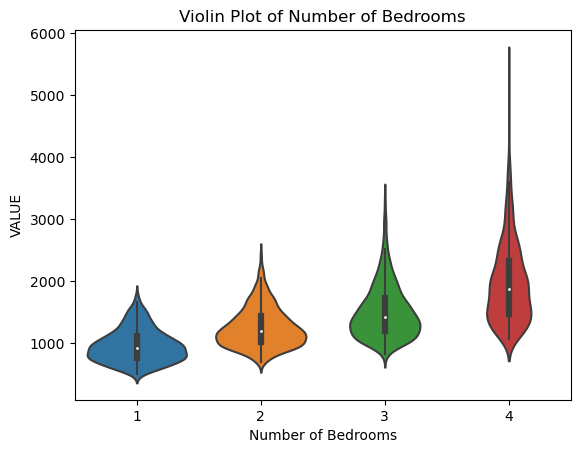

In [57]:
# this visualisation method used for to see different between the categories also, frequency, min and max value and median
# the houses that has 4 or more bedrooms , rent price has big variance . it may have many outliers 
# other count of bedrooms mod and median values look like close
sns.violinplot(data=dub_data, x="Number of Bedrooms", y="VALUE")
plt.title("Violin Plot of Number of Bedrooms")

Text(0.5, 1.0, 'Violin Plot of Property Type')

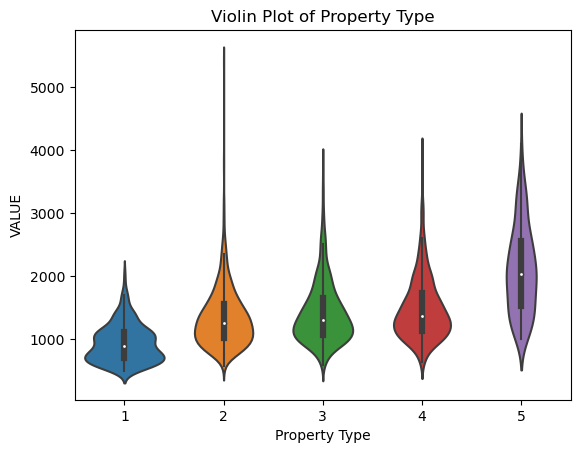

In [58]:
# Apartments  may has some outliers
# number 3 or 4 looks pretty close each other as mean,mod and frequency
sns.violinplot(data=dub_data, x="Property Type", y="VALUE")
plt.title("Violin Plot of Property Type")

Text(0.5, 1.0, 'Scatter Plot of Number of Bedrooms and Property Type')

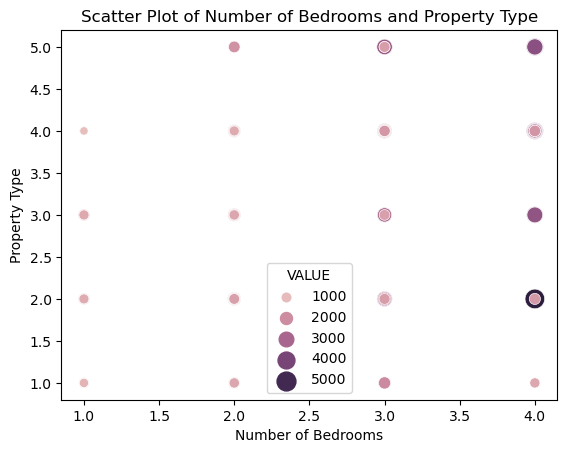

In [59]:
# as both the number of property types and the number of bedrooms increase in value, the value increases
sns.scatterplot(
    data=dub_data, x="Number of Bedrooms", y="Property Type", hue="VALUE", size="VALUE",
    sizes=(20, 200)
)
plt.title("Scatter Plot of Number of Bedrooms and Property Type")

Text(0.5, 1.0, 'Bar Plot of Number of Bedrooms')

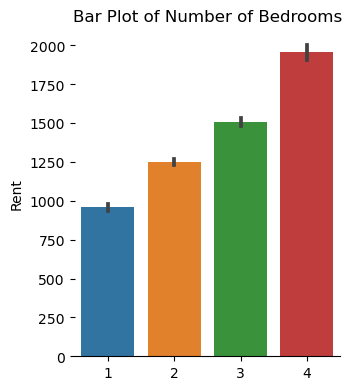

In [60]:
#Number 4 has biggest variance also average rent different each groups
g = sns.catplot(
    data=dub_data, x="Number of Bedrooms", y="VALUE", 
    kind="bar", height=4, aspect=.9,
)
g.set_axis_labels("", "Rent")
g.despine(left=True)
plt.title("Bar Plot of Number of Bedrooms")

Text(0.5, 1.0, 'Violin Plot of Property Type')

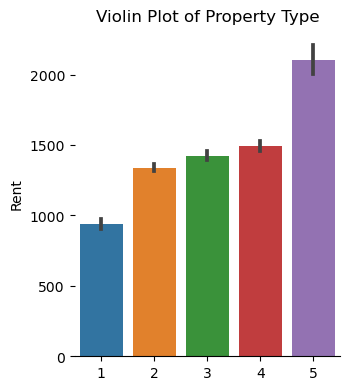

In [61]:
#Number 5 has biggest variance also average rent different each groups
g = sns.catplot(
    data=dub_data, x="Property Type", y="VALUE", 
    kind="bar", height=4, aspect=.9,
)
g.set_axis_labels("", "Rent")
g.despine(left=True)
plt.title("Bar Plot of Property Type")

In [62]:
#property type 4 and 3 have similar mean and variance. therefore they will be combined into a single group
dub_data.groupby("Property Type", as_index=False)['VALUE'].agg(["mean","var","median"]).sort_values(by="mean",ascending=False)

,mean,var,median
Property Type,,,
5,2104.509563,484169.770838,2031.790
4,1493.604594,249337.212492,1372.300
3,1425.137322,238999.975003,1309.120
2,1339.815848,207228.087926,1262.330
1,940.361722,89277.215869,896.325


In [63]:
# corelattion before grouping 
dub_data["VALUE"].corr(dub_data["Property Type"])

0.36328245459656167

In [64]:
dub_data["Property Type"]= [3 if i==3 else 3 if i==4 else i for i in dub_data["Property Type"]]

Text(0.5, 1.0, 'Violin Plot of New Property Type')

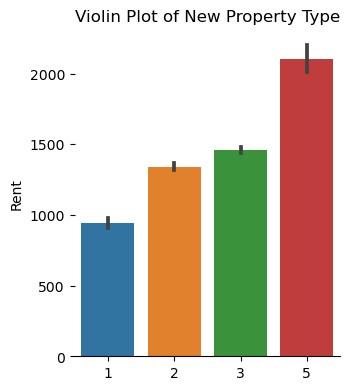

In [65]:
g = sns.catplot(
    data=dub_data, x="Property Type", y="VALUE", 
    kind="bar", height=4, aspect=.9,
)
g.set_axis_labels("", "Rent")
g.despine(left=True)
plt.title("Violin Plot of New Property Type")

Text(0.5, 1.0, 'SCatter Plot of VALUE by Year')

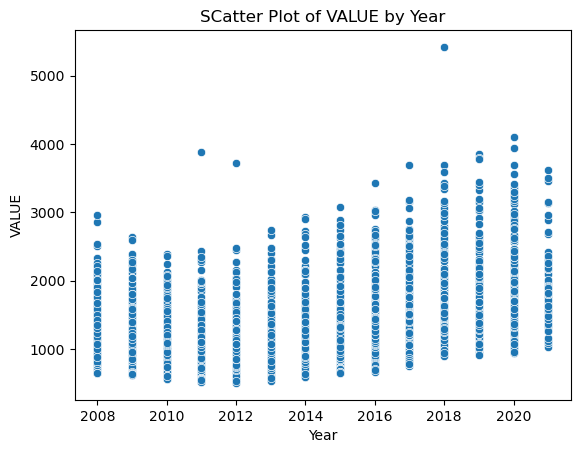

In [66]:
# as number of years increase, the Value  increases (except 2009-2010 \ 2021)
#rents have started to exceed 3000 euros since 2015
sns.scatterplot(data=dub_data, x="Year", y="VALUE")
plt.title("SCatter Plot of VALUE by Year")

Text(0.5, 1.0, 'Scatter Plot of VALUE by Year with Number of Beedroms ')

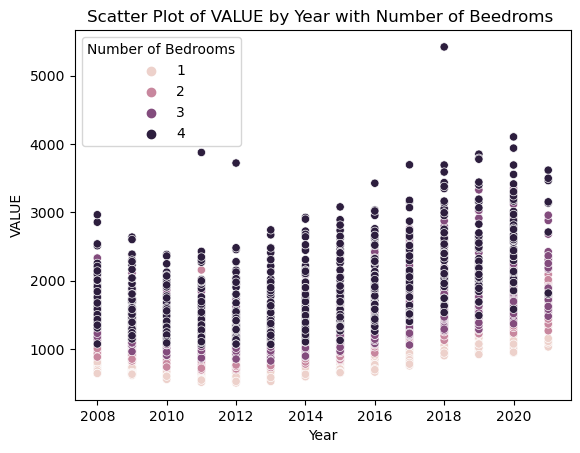

In [67]:
#fluctuation is the same over the years based on the number of rooms
#Prices increase as the number of rooms increases.
sns.scatterplot(data=dub_data, x="Year", y="VALUE", hue="Number of Bedrooms")
plt.title("Scatter Plot of VALUE by Year with Number of Beedroms ")

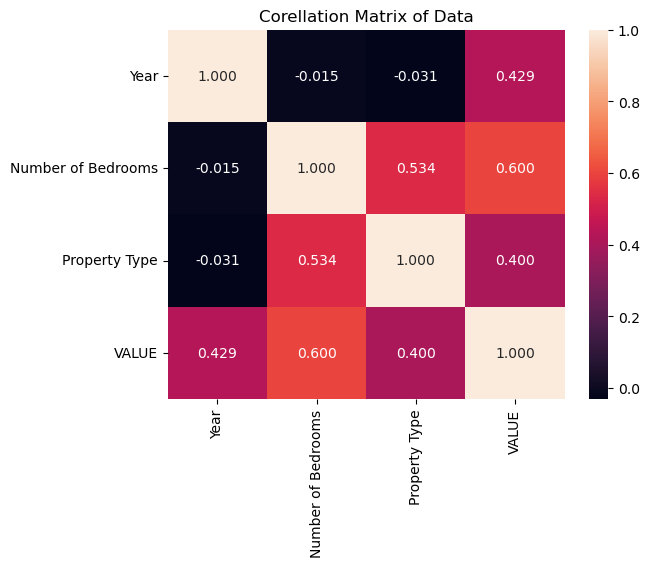

In [68]:
# heat map for correlation
#number of bedrooms has the highest corellation with VALUE
#property type has the lowest corellation with VALUE
#after grouping , the corellation increased from 36 to 40
sns.heatmap(dub_data.corr(),annot=True,fmt=".3f")
plt.title("Corellation Matrix of Data")
plt.show()

### Distrubation Analys

C:\Users\gorke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distrubation plot of VALUE ')

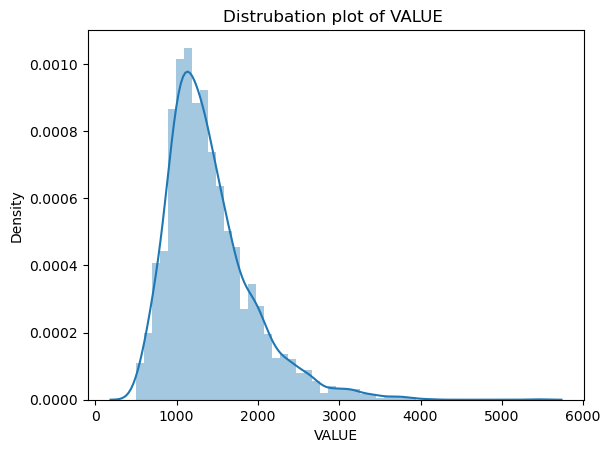

In [69]:
sns.distplot(dub_data["VALUE"])
plt.title("Distrubation plot of VALUE ")

In [70]:
skewness = skew(dub_data['VALUE'])
kurtosis = kurtosis(dub_data['VALUE'])

print("skewness statistic: ", skewness)
print("kurtosis statistic: ", kurtosis)

skewness statistic:  1.4067168754257804
kurtosis statistic:  3.211146207068041


In [71]:
# kurtosis close 3 . the data has normal distribation (mesokurtic)
# skewness 1.4 . the data has positively skewed distribation

In [72]:
statis, pvalue = shapiro(dub_data["VALUE"])
print('Test statistic: ', statis)
print('p-value: ', pvalue)

Test statistic:  0.9089295864105225
p-value:  9.292850896016457e-41


In [73]:
#This method is used for small data 
# p-value < 0.05 data set does not follow a normal distribution

In [74]:
jb_statis, pvalue = jarque_bera(dub_data["VALUE"])
print(pvalue)

0.0


In [75]:
#p-value < 0.05 data set does not follow a normal distribution

In [76]:
# Normalization with Min Max Scaler
scaler = MinMaxScaler()
MM_norm_data= scaler.fit_transform(dub_data[["VALUE"]])
MM_norm_data=pd.DataFrame(MM_norm_data,columns=["VALUE"])

In [77]:
print(type(MM_norm_data))

<class 'pandas.core.frame.DataFrame'>


C:\Users\gorke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distrubation plot of VALUE After Min Max Scaler ')

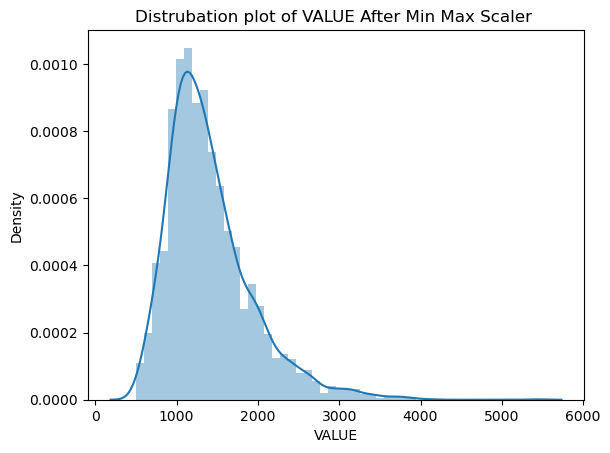

In [78]:
sns.distplot(dub_data["VALUE"])
plt.title("Distrubation plot of VALUE After Min Max Scaler ")

In [79]:
skewness1 = skew(MM_norm_data['VALUE'])
#kurto_val = kurtosis(MM_norm_data['VALUE'])
print("skewness statistic: ", skewness1)
#print("kurtosis statistic: ", kurto_val)

skewness statistic:  1.4067168754257802


In [80]:
# skewness 1.4 . the data has positively skewed distribation

In [81]:
jb_statis, pvalue = jarque_bera(dub_data["VALUE"])
print(pvalue)

0.0


In [82]:
# Robust transform is more effective on data with outliers
scaler = RobustScaler()
RBS_data= scaler.fit_transform(dub_data[["VALUE"]])
RBS_data=pd.DataFrame(RBS_data,columns=["VALUE"])

C:\Users\gorke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distrubation plot of VALUE after Robust Transform ')

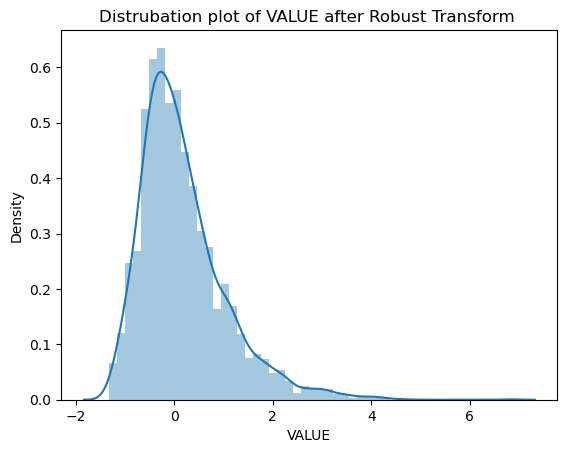

In [83]:
sns.distplot(RBS_data["VALUE"])
plt.title("Distrubation plot of VALUE after Robust Transform ")

In [84]:
skew2 = skew(RBS_data['VALUE'])
#kurto2 = kurtosis(RBS_data["VALUE"])
print("skewness statistic: ", skew2)
#print("kurtosis statistic: ", kurto2)

skewness statistic:  1.4067168754257797


In [85]:
jb_statis, pvalue = jarque_bera(RBS_data["VALUE"])
print(pvalue)

0.0


In [86]:
#p-value < 0.05 data set does not follow a normal distribution

In [87]:
# Removing Outliers

In [88]:
dubnew_data = dub_data[(dub_data["VALUE"] >= q1 - outlier_step) & (dub_data["VALUE"] <= q3 + outlier_step)]

In [89]:
# 127 datas was removed
dubnew_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3197.0,2013.992806,3.788066,2008.00,2011.00,2014.00,2017.00,2021.00
Number of Bedrooms,3197.0,2.448546,0.977338,1.00,2.00,2.00,3.00,4.00
Property Type,3197.0,2.557085,0.832467,1.00,2.00,3.00,3.00,5.00
VALUE,3197.0,1343.334379,421.997936,500.76,1034.28,1275.63,1591.98,2557.98


C:\Users\gorke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distrubation plot of VALUE without outliers ')

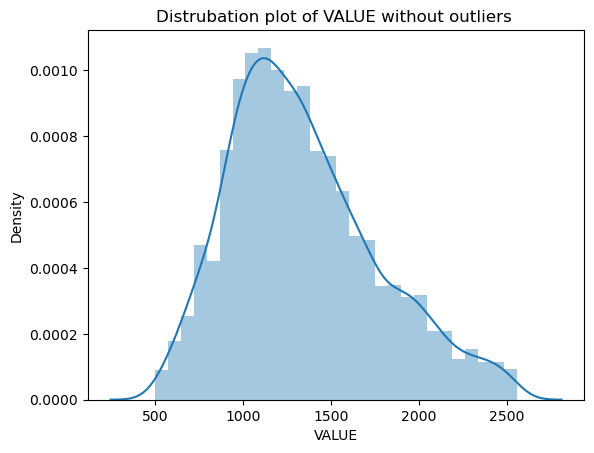

In [90]:
sns.distplot(dubnew_data["VALUE"])
plt.title("Distrubation plot of VALUE without outliers ")

In [91]:
dubnew_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3197 entries, 0 to 3322
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                3197 non-null   int64  
 1   Number of Bedrooms  3197 non-null   int64  
 2   Property Type       3197 non-null   int64  
 3   Location            3197 non-null   object 
 4   VALUE               3197 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 149.9+ KB


In [92]:
skewness_new = skew(dubnew_data['VALUE'])
#kurtosis_new = kurtosis(dubnew_data['VALUE'])

print("skewness statistic: ", skewness_new)
#print("kurtosis statistic: ", kurtosis_new)

skewness statistic:  0.6300732444151602


In [93]:
# skewness 0.6 . the data has symmetrical distribation

In [94]:
#create dummy variable
dummy_var=pd.get_dummies(dubnew_data["Location"])
#concat dummy variable
dubdummy_data=pd.concat([dubnew_data,dummy_var],axis=1)


In [95]:
dubdummy_data.head()

,Year,Number of Bedrooms,Property Type,Location,VALUE,"Balbriggan, Dublin","Blackrock, Dublin","Clondalkin, Dublin 22",Dublin 1,Dublin 10,...,Dublin 4,Dublin 5,Dublin 6,Dublin 6W,Dublin 7,Dublin 8,Dublin 9,"Dun Laoghaire, Dublin","Malahide, Dublin","Swords, Dublin"
0,2008,1,3,Dublin 3,745.08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008,1,3,Dublin 4,911.54,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2008,1,3,Dublin 6,801.92,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2008,1,3,Dublin 7,642.81,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2008,1,3,Dublin 8,891.94,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [96]:
# Normalization with Min Max Scaler
#Since the year values are very large compared to other variables, a min-max transformation has been applied in order 
#to reduce the effect on the coefficient. The reason for choosing Min-Max transformation is that the other variables are 
#expressed with similar values such as 0,1,2.
scaler = MinMaxScaler()
dubdummy_data["Year"]= scaler.fit_transform(dubdummy_data[["Year"]])


In [97]:
#drop Location column
dubdummy_data.drop("Location",axis=1,inplace=True)

In [98]:
# TRain TEst Split 
X_train = dubdummy_data.drop(labels = "VALUE",axis=1)
y_train = dubdummy_data["VALUE"]
#test size %20 test data %80 percent train data
#random state controls the shuffling process (number 44 is my hometown number in Turkey)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size =0.20, random_state = 44 )
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))


X_train 2557
X_test 640
y_train 2557
y_test 640


## Modelling

In [99]:
# Lineer REgression , Decission Tree, Random Forest Regressor are using for anlaysis

### Lineer Regression

In [100]:

print(X_train.shape)
print(y_train.shape)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
b0_=linreg.intercept_
b1_=linreg.coef_
print("b0_ :",b0_)
print("b1_ ;", b1_)
print("R_2 score :", linreg.score(X_train,y_train))

(2557, 30)
(2557,)
b0_ : 27284020494206.332
b1_ ; [ 6.92495863e+02  2.54620601e+02  5.92980353e+01 -2.72840205e+13
 -2.72840205e+13 -2.72840205e+13 -2.72840205e+13 -2.72840205e+13
 -2.72840205e+13 -2.72840205e+13 -2.72840205e+13 -2.72840205e+13
 -2.72840205e+13 -2.72840205e+13 -2.72840205e+13 -2.72840205e+13
 -2.72840205e+13 -2.72840205e+13 -2.72840205e+13 -2.72840205e+13
 -2.72840205e+13 -2.72840205e+13 -2.72840205e+13 -2.72840205e+13
 -2.72840205e+13 -2.72840205e+13 -2.72840205e+13 -2.72840205e+13
 -2.72840205e+13 -2.72840205e+13]
R_2 score : 0.7426298425238194


In [135]:
import statsmodels.api as sm

X_train_cons = sm.add_constant(X_train)


# Note the difference in argument order
model = sm.OLS(y_train, X_train_cons).fit()
predictions = model.predict(X_train_cons) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     251.4
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -17345.
No. Observations:                2557   AIC:                         3.475e+04
Df Residuals:                    2527   BIC:                         3.493e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   233.9599     16.695     14.014      0.000     201.223     266.697
Year                    692.4948     14.635     47.319      0.000     663.798     721.192
Number of Bedrooms      254.6147      5.179     49.165      0.000     244.460     264.770
Property Type            59.3020      6.234      9.512      0.000      47.077      71.527
Balbriggan, Dublin     -313.4198     23.879    -13.126      0.000    -360.243    -266.596
Blackrock, Dublin       278.2749     21.942     12.682      0.000     235.248     321.301
Clondalkin, Dublin 22  -217.6869     22.766     -9.562      0.000    -262.329    -173.045
Dublin 1                 42.3836     22.009      1.926      0.054      -0.774      85.542
Dublin 10              -200.8261     31.549     -6.366      0.000    -262.690    -138.962
Dublin 11              -158.2636     21.054     -7.517      0.000    -199.548    -116.979
Dublin 12               -93.8709     20.764     -4.521      0.000    -134.587     -53.155
Dublin 13               -29.4482     21.424     -1.375      0.169     -71.459      12.562
Dublin 14               240.2004     21.583     11.129      0.000     197.879     282.522
Dublin 15              -204.8717     19.730    -10.384      0.000    -243.560    -166.183
Dublin 16               100.5742     23.956      4.198      0.000      53.598     147.550
Dublin 17              -163.2879     31.887     -5.121      0.000    -225.816    -100.760
Dublin 18               177.7682     23.671      7.510      0.000     131.352     224.184
Dublin 2                367.3346     24.633     14.912      0.000     319.032     415.637
Dublin 20              -129.7648     26.447     -4.907      0.000    -181.624     -77.905
Dublin 24              -214.2692     20.501    -10.452      0.000    -254.470    -174.069
Dublin 3                 12.9997     18.668      0.696      0.486     -23.607      49.606
Dublin 4                390.7482     20.073     19.467      0.000     351.388     430.109
Dublin 5                -69.8200     23.439     -2.979      0.003    -115.782     -23.858
Dublin 6                191.3679     17.399     10.999      0.000     157.250     225.486
Dublin 6W                99.2192     20.783      4.774      0.000      58.466     139.972
Dublin 7                -71.8374     18.947     -3.792      0.000    -108.990     -34.685
Dublin 8                 36.6235     18.597      1.969      0.049       0.156      73.091
Dublin 9                -32.1753     18.563     -1.733      0.083     -68.575       4.224
Dun Laoghaire, Dublin   151.0401     25.573      5.906      0.000     100.894     201.186
Malahide, Dublin        208.9159     23.903      8.740      0.000     162.045     255.787
Swords, Dublin         -163.9486     23.199     -7.067      0.000    -209.439    -118.458
=======================

In [136]:
# The variable "Clondalkin, Dublin 3 " is statistically insignificant P>|t| > 0.05 . So I dropC Dublin 3 column from the dataset
x = X_train_cons.drop(["Dublin 3"], axis=1)

# Note the difference in argument order
model = sm.OLS(y_train, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     251.4
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        11:56:09   Log-Likelihood:                -17345.
No. Observations:                2557   AIC:                         3.475e+04
Df Residuals:                    2527   BIC:                         3.493e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   246.9596     24.669     10.011      0.000     198.586     295.333
Year                    692.4948     14.635     47.319      0.000     663.798     721.192
Number of Bedrooms      254.6147      5.179     49.165      0.000     244.460     264.770
Property Type            59.3020      6.234      9.512      0.000      47.077      71.527
Balbriggan, Dublin     -326.4195     30.816    -10.592      0.000    -386.847    -265.992
Blackrock, Dublin       265.2752     29.236      9.074      0.000     207.947     322.604
Clondalkin, Dublin 22  -230.6866     29.901     -7.715      0.000    -289.320    -172.053
Dublin 1                 29.3839     29.250      1.005      0.315     -27.972      86.740
Dublin 10              -213.8258     37.513     -5.700      0.000    -287.385    -140.266
Dublin 11              -171.2633     28.517     -6.006      0.000    -227.182    -115.344
Dublin 12              -106.8706     28.284     -3.778      0.000    -162.333     -51.408
Dublin 13               -42.4479     28.829     -1.472      0.141     -98.979      14.083
Dublin 14               227.2007     28.956      7.846      0.000     170.421     283.981
Dublin 15              -217.8714     27.498     -7.923      0.000    -271.792    -163.951
Dublin 16                87.5745     30.899      2.834      0.005      26.984     148.165
Dublin 17              -176.2876     37.816     -4.662      0.000    -250.441    -102.135
Dublin 18               164.7685     30.660      5.374      0.000     104.647     224.890
Dublin 2                354.3349     31.410     11.281      0.000     292.743     415.926
Dublin 20              -142.7645     33.003     -4.326      0.000    -207.480     -78.049
Dublin 24              -227.2689     28.089     -8.091      0.000    -282.349    -172.189
Dublin 4                377.7485     27.739     13.618      0.000     323.355     432.142
Dublin 5                -82.8197     30.456     -2.719      0.007    -142.542     -23.098
Dublin 6                178.3682     25.720      6.935      0.000     127.934     228.803
Dublin 6W                86.2195     28.308      3.046      0.002      30.710     141.729
Dublin 7                -84.8371     26.872     -3.157      0.002    -137.531     -32.144
Dublin 8                 23.6238     26.610      0.888      0.375     -28.555      75.802
Dublin 9                -45.1750     26.581     -1.700      0.089     -97.298       6.948
Dun Laoghaire, Dublin   138.0404     32.219      4.284      0.000      74.862     201.218
Malahide, Dublin        195.9162     30.852      6.350      0.000     135.418     256.414
Swords, Dublin         -176.9483     30.262     -5.847      0.000    -236.290    -117.607
==============================================================================
Omnibus:                       91.

In [137]:
# The variable "Clondalkin, Dublin 8 " is statistically insignificant P>|t| > 0.05 . So I dropC Dublin 3 column from the dataset
x = X_train_cons.drop(["Dublin 3","Dublin 8"], axis=1)

# Note the difference in argument order
model = sm.OLS(y_train, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     260.4
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        12:12:10   Log-Likelihood:                -17345.
No. Observations:                2557   AIC:                         3.475e+04
Df Residuals:                    2528   BIC:                         3.492e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   258.7709     20.773     12.457      0.000     218.037     299.504
Year                    692.4164     14.634     47.317      0.000     663.721     721.112
Number of Bedrooms      254.6627      5.178     49.179      0.000     244.509     264.817
Property Type            59.2897      6.234      9.511      0.000      47.065      71.514
Balbriggan, Dublin     -338.2742     27.772    -12.180      0.000    -392.732    -283.816
Blackrock, Dublin       253.4124     26.002      9.746      0.000     202.424     304.401
Clondalkin, Dublin 22  -242.5462     26.750     -9.067      0.000    -295.001    -190.091
Dublin 1                 17.5371     26.027      0.674      0.501     -33.500      68.574
Dublin 10              -225.6755     35.057     -6.437      0.000    -294.419    -156.933
Dublin 11              -183.1262     25.192     -7.269      0.000    -232.524    -133.728
Dublin 12              -118.7310     24.929     -4.763      0.000    -167.615     -69.847
Dublin 13               -54.3227     25.537     -2.127      0.034    -104.399      -4.246
Dublin 14               215.3277     25.682      8.384      0.000     164.968     265.687
Dublin 15              -229.7491     24.023     -9.564      0.000    -276.855    -182.643
Dublin 16                75.7022     27.855      2.718      0.007      21.082     130.322
Dublin 17              -188.1383     35.380     -5.318      0.000    -257.515    -118.762
Dublin 18               152.8990     27.590      5.542      0.000      98.797     207.001
Dublin 2                342.4916     28.435     12.045      0.000     286.734     398.250
Dublin 20              -154.6286     30.175     -5.124      0.000    -213.799     -95.458
Dublin 24              -239.1337     24.705     -9.680      0.000    -287.578    -190.690
Dublin 4                365.8941     24.313     15.050      0.000     318.220     413.569
Dublin 5                -94.6789     27.369     -3.459      0.001    -148.348     -41.010
Dublin 6                166.5093     21.978      7.576      0.000     123.412     209.606
Dublin 6W                74.3500     24.951      2.980      0.003      25.423     123.277
Dublin 7                -96.6962     23.316     -4.147      0.000    -142.416     -50.976
Dublin 9                -57.0358     22.978     -2.482      0.013    -102.094     -11.977
Dun Laoghaire, Dublin   126.1957     29.325      4.303      0.000      68.691     183.700
Malahide, Dublin        184.0425     27.801      6.620      0.000     129.527     238.558
Swords, Dublin         -188.8148     27.150     -6.955      0.000    -242.052    -135.577
==============================================================================
Omnibus:                       91.351   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarqu

In [138]:
# The variable "Dublin 1 " is statistically insignificant P>|t| > 0.05 . So I dropC Dublin 3 column from the dataset
x = X_train_cons.drop(["Dublin 3","Dublin 8","Dublin 1"], axis=1)

# Note the difference in argument order
model = sm.OLS(y_train, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     270.1
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        12:13:07   Log-Likelihood:                -17346.
No. Observations:                2557   AIC:                         3.475e+04
Df Residuals:                    2529   BIC:                         3.491e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   264.0528     19.235     13.728      0.000     226.335     301.771
Year                    692.3970     14.632     47.321      0.000     663.705     721.089
Number of Bedrooms      254.6086      5.177     49.180      0.000     244.457     264.760
Property Type            59.0553      6.224      9.489      0.000      46.851      71.259
Balbriggan, Dublin     -342.8026     26.944    -12.723      0.000    -395.636    -289.969
Blackrock, Dublin       248.9079     25.126      9.907      0.000     199.639     298.177
Clondalkin, Dublin 22  -247.0720     25.890     -9.543      0.000    -297.841    -196.303
Dublin 10              -230.2153     34.400     -6.692      0.000    -297.669    -162.761
Dublin 11              -187.6920     24.260     -7.737      0.000    -235.264    -140.120
Dublin 12              -123.2979     23.988     -5.140      0.000    -170.335     -76.260
Dublin 13               -58.7606     24.671     -2.382      0.017    -107.138     -10.384
Dublin 14               210.8733     24.813      8.498      0.000     162.216     259.530
Dublin 15              -234.1353     23.121    -10.126      0.000    -279.474    -188.797
Dublin 16                71.2486     27.056      2.633      0.009      18.194     124.303
Dublin 17              -192.7269     34.715     -5.552      0.000    -260.799    -124.655
Dublin 18               148.4490     26.785      5.542      0.000      95.926     200.972
Dublin 2                337.7738     27.556     12.258      0.000     283.738     391.809
Dublin 20              -159.1894     29.403     -5.414      0.000    -216.846    -101.533
Dublin 24              -243.5983     23.797    -10.236      0.000    -290.263    -196.934
Dublin 4                361.3411     23.352     15.474      0.000     315.550     407.132
Dublin 5                -99.1985     26.532     -3.739      0.000    -151.225     -47.172
Dublin 6                161.9188     20.893      7.750      0.000     120.949     202.889
Dublin 6W                69.8022     24.018      2.906      0.004      22.705     116.900
Dublin 7               -101.2832     22.297     -4.542      0.000    -145.006     -57.560
Dublin 9                -61.6221     21.945     -2.808      0.005    -104.654     -18.590
Dun Laoghaire, Dublin   121.5173     28.488      4.265      0.000      65.654     177.380
Malahide, Dublin        179.5365     26.982      6.654      0.000     126.627     232.446
Swords, Dublin         -193.3166     26.312     -7.347      0.000    -244.911    -141.722
==============================================================================
Omnibus:                       93.041   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.455
Skew:                           0.483   Prob(JB):       

In [140]:
#  Create a column of 1s
const_column = pd.Series(1, index=X_test.index, name='const')

# X_test dataframe'ine const sütununu ekleme
X_test_with_const = pd.concat([const_column, X_test], axis=1)
X_test_with_const.head()

,const,Year,Number of Bedrooms,Property Type,"Balbriggan, Dublin","Blackrock, Dublin","Clondalkin, Dublin 22",Dublin 1,Dublin 10,Dublin 11,...,Dublin 4,Dublin 5,Dublin 6,Dublin 6W,Dublin 7,Dublin 8,Dublin 9,"Dun Laoghaire, Dublin","Malahide, Dublin","Swords, Dublin"
2617,1,0.769231,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,1,0.076923,4,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1834,1,0.538462,2,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
673,1,0.153846,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2826,1,0.846154,2,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [141]:
X_test_lineer = X_test_with_const.drop(["Dublin 3","Dublin 8","Dublin 1"], axis=1)
prediction_test=model.predict(X_test_lineer)
mse = mean_squared_error(y_test, prediction_test)
mae = mean_absolute_error(y_test, prediction_test)
R_2 = r2_score(y_test, prediction_test)
print("mse:" ,mse)
print("mae:", mae)
print("R_2:", R_2)

mse: 43891.35917531174
mae: 170.16313207803273
R_2: 0.7569829478267179


In [ ]:
# All variables is statistically significant.
#Also f prob < 0.05 the last model and dependent variable is statistically significant.

In [ ]:
#mse: 43891.35917531174
#mae: 170.16313207803273
#R_2: 0.7569829478267179

In [101]:
import statsmodels.api as sm



# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     251.4
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        10:52:23   Log-Likelihood:                -17345.
No. Observations:                2557   AIC:                         3.475e+04
Df Residuals:                    2527   BIC:                         3.493e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Year                    692.4948     14.635     47.319      0.000     663.798     721.192
Number of Bedrooms      254.6147      5.179     49.165      0.000     244.460     264.770
Property Type            59.3020      6.234      9.512      0.000      47.077      71.527
Balbriggan, Dublin      -79.4599     29.865     -2.661      0.008    -138.023     -20.897
Blackrock, Dublin       512.2347     28.151     18.196      0.000     457.034     567.436
Clondalkin, Dublin 22    16.2730     28.848      0.564      0.573     -40.295      72.841
Dublin 1                276.3435     26.475     10.438      0.000     224.428     328.259
Dublin 10                33.1338     36.456      0.909      0.364     -38.353     104.620
Dublin 11                75.6963     26.877      2.816      0.005      22.993     128.400
Dublin 12               140.0890     26.715      5.244      0.000      87.704     192.474
Dublin 13               204.5117     28.592      7.153      0.000     148.446     260.577
Dublin 14               474.1603     28.396     16.698      0.000     418.479     529.841
Dublin 15                29.0882     27.730      1.049      0.294     -25.289      83.465
Dublin 16               334.5340     30.510     10.965      0.000     274.707     394.361
Dublin 17                70.6719     36.556      1.933      0.053      -1.010     142.354
Dublin 18               411.7281     30.268     13.603      0.000     352.375     471.081
Dublin 2                601.2944     28.404     21.170      0.000     545.597     656.991
Dublin 20               104.1951     31.590      3.298      0.001      42.251     166.139
Dublin 24                19.6907     27.566      0.714      0.475     -34.364      73.746
Dublin 3                246.9596     24.669     10.011      0.000     198.586     295.333
Dublin 4                624.7080     25.926     24.095      0.000     573.869     675.547
Dublin 5                164.1399     29.488      5.566      0.000     106.316     221.963
Dublin 6                425.3278     23.453     18.135      0.000     379.338     471.317
Dublin 6W               333.1791     26.857     12.406      0.000     280.516     385.842
Dublin 7                162.1224     24.850      6.524      0.000     113.395     210.850
Dublin 8                270.5833     24.669     10.968      0.000     222.209     318.958
Dublin 9                201.7846     24.797      8.137      0.000     153.160     250.409
Dun Laoghaire, Dublin   385.0000     29.775     12.930      0.000     326.615     443.385
Malahide, Dublin        442.8758     30.013     14.756      0.000     384.024     501.728
Swords, Dublin           70.0113     29.559      2.369      0.018      12.049     127.973
==============================================================================
Omnibus:                       91.

In [102]:
# The variable "Clondalkin, Dublin 22 " is statistically insignificant P>|t| > 0.05 . So I dropClondalkin, Dublin 22 column from the dataset
x = X_train.drop(["Clondalkin, Dublin 22"], axis=1)

# Note the difference in argument order
model = sm.OLS(y_train, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  VALUE   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              3702.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        10:52:23   Log-Likelihood:                         -17345.
No. Observations:                2557   AIC:                                  3.475e+04
Df Residuals:                    2528   BIC:                                  3.492e+04
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Year                    694.9582     13.966     49.761      0.000     667.572     722.344
Number of Bedrooms      255.1147      5.102     50.006      0.000     245.111     265.119
Property Type            60.5798      5.807     10.432      0.000      49.192      71.968
Balbriggan, Dublin      -85.2728     28.027     -3.042      0.002    -140.232     -30.314
Blackrock, Dublin       506.4659     26.224     19.313      0.000     455.043     557.888
Dublin 1                271.5556     25.074     10.830      0.000     222.387     320.724
Dublin 10                27.5347     35.074      0.785      0.433     -41.242      96.311
Dublin 11                70.2319     25.067      2.802      0.005      21.077     119.387
Dublin 12               134.5782     24.861      5.413      0.000      85.829     183.328
Dublin 13               198.2298     26.330      7.529      0.000     146.599     249.861
Dublin 14               468.0724     26.261     17.824      0.000     416.577     519.568
Dublin 15                22.5246     25.168      0.895      0.371     -26.827      71.876
Dublin 16               328.3607     28.476     11.531      0.000     272.522     384.199
Dublin 17                65.2404     35.260      1.850      0.064      -3.901     134.382
Dublin 18               405.5537     28.216     14.373      0.000     350.224     460.883
Dublin 2                596.7729     27.246     21.903      0.000     543.347     650.199
Dublin 20                98.7348     30.066      3.284      0.001      39.778     157.691
Dublin 24                13.5725     25.340      0.536      0.592     -36.116      63.261
Dublin 3                241.6148     22.773     10.609      0.000     196.958     286.271
Dublin 4                619.3085     24.092     25.706      0.000     572.067     666.550
Dublin 5                158.3292     27.627      5.731      0.000     104.156     212.503
Dublin 6                420.0806     21.527     19.514      0.000     377.869     462.293
Dublin 6W               327.6010     24.966     13.122      0.000     278.644     376.558
Dublin 7                156.8038     22.988      6.821      0.000     111.726     201.881
Dublin 8                265.2103     22.753     11.656      0.000     220.593     309.827
Dublin 9                196.3315     22.832      8.599      0.000     151.560     241.103
Dun Laoghaire, Dublin   380.1799     28.518     13.331      0.000     324.258     436.102
Malahide, Dublin        436.9913     28.138     15.530      0.000     381.816     492.167
Swords, Dublin           64.0330     27.590      2.321      0.020       9.932     118.134
==============================================================================
Omnibus:                 

In [103]:
# The variable "Dublin 24 " is statistically insignificant P>|t| > 0.05 . So I drop Dublin 24 column from the dataset
x = X_train.drop(["Clondalkin, Dublin 22","Dublin 24"], axis=1)

# Note the difference in argument order
model = sm.OLS(y_train, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  VALUE   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              3835.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        10:52:23   Log-Likelihood:                         -17345.
No. Observations:                2557   AIC:                                  3.475e+04
Df Residuals:                    2529   BIC:                                  3.491e+04
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Year                    696.6226     13.614     51.170      0.000     669.927     723.318
Number of Bedrooms      255.4632      5.059     50.494      0.000     245.542     265.384
Property Type            61.5742      5.502     11.191      0.000      50.785      72.363
Balbriggan, Dublin      -89.5686     26.852     -3.336      0.001    -142.222     -36.915
Blackrock, Dublin       502.1869     24.974     20.108      0.000     453.216     551.158
Dublin 1                268.0287     24.191     11.080      0.000     220.593     315.465
Dublin 10                23.3856     34.203      0.684      0.494     -43.683      90.455
Dublin 11                66.1923     23.903      2.769      0.006      19.322     113.063
Dublin 12               130.5077     23.667      5.514      0.000      84.098     176.917
Dublin 13               193.5742     24.851      7.789      0.000     144.844     242.304
Dublin 14               463.5548     24.866     18.642      0.000     414.794     512.315
Dublin 15                17.6516     23.463      0.752      0.452     -28.356      63.660
Dublin 16               323.7857     27.161     11.921      0.000     270.526     377.046
Dublin 17                61.2328     34.452      1.777      0.076      -6.325     128.790
Dublin 18               400.9749     26.886     14.914      0.000     348.253     453.696
Dublin 2                593.4446     26.524     22.374      0.000     541.434     645.455
Dublin 20                94.6952     29.101      3.254      0.001      37.632     151.759
Dublin 3                237.6639     21.543     11.032      0.000     195.421     279.907
Dublin 4                615.3009     22.897     26.873      0.000     570.402     660.200
Dublin 5                154.0307     26.432      5.827      0.000     102.201     205.861
Dublin 6                416.1986     20.267     20.536      0.000     376.457     455.941
Dublin 6W               323.4771     23.746     13.622      0.000     276.913     370.041
Dublin 7                152.8724     21.782      7.018      0.000     110.160     195.584
Dublin 8                261.2370     21.507     12.147      0.000     219.064     303.410
Dublin 9                192.3114     21.560      8.920      0.000     150.034     234.589
Dun Laoghaire, Dublin   376.6303     27.734     13.580      0.000     322.247     431.014
Malahide, Dublin        432.6403     26.936     16.062      0.000     379.822     485.459
Swords, Dublin           59.6151     26.324      2.265      0.024       7.996     111.235
==============================================================================
Omnibus:                       90.719   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.00

In [104]:
# The variable "Dublin 15 " is statistically insignificant P>|t| > 0.05 . So I drop Dublin 15 column from the dataset
x = X_train.drop(["Clondalkin, Dublin 22","Dublin 24","Dublin 15"], axis=1)

# Note the difference in argument order
model = sm.OLS(y_train, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  VALUE   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              3978.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        10:52:23   Log-Likelihood:                         -17346.
No. Observations:                2557   AIC:                                  3.475e+04
Df Residuals:                    2530   BIC:                                  3.490e+04
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Year                    698.0768     13.475     51.806      0.000     671.654     724.500
Number of Bedrooms      255.9041      5.025     50.928      0.000     246.051     265.757
Property Type            62.6549      5.311     11.798      0.000      52.241      73.068
Balbriggan, Dublin      -94.2049     26.133     -3.605      0.000    -145.448     -42.961
Blackrock, Dublin       497.5366     24.195     20.564      0.000     450.093     544.980
Dublin 1                264.2339     23.657     11.169      0.000     217.844     310.623
Dublin 10                18.9028     33.677      0.561      0.575     -47.135      84.940
Dublin 11                61.8103     23.180      2.667      0.008      16.356     107.264
Dublin 12               126.1012     22.929      5.500      0.000      81.139     171.063
Dublin 13               188.5043     23.917      7.881      0.000     141.605     235.404
Dublin 14               458.6290     23.987     19.120      0.000     411.593     505.665
Dublin 16               318.8067     26.340     12.103      0.000     267.156     370.457
Dublin 17                56.9159     33.968      1.676      0.094      -9.692     123.524
Dublin 18               395.9942     26.056     15.198      0.000     344.900     447.088
Dublin 2                589.8691     26.092     22.607      0.000     538.705     641.034
Dublin 20                90.3076     28.508      3.168      0.002      34.407     146.208
Dublin 3                233.3911     20.779     11.232      0.000     192.646     274.137
Dublin 4                610.9531     22.154     27.578      0.000     567.512     654.395
Dublin 5                149.3784     25.696      5.813      0.000      98.991     199.766
Dublin 6                411.9881     19.477     21.152      0.000     373.795     450.181
Dublin 6W               318.9928     22.984     13.879      0.000     273.923     364.062
Dublin 7                148.6130     21.031      7.066      0.000     107.372     189.853
Dublin 8                256.9314     20.730     12.394      0.000     216.282     297.581
Dublin 9                187.9654     20.770      9.050      0.000     147.237     228.694
Dun Laoghaire, Dublin   372.8167     27.264     13.674      0.000     319.354     426.279
Malahide, Dublin        427.9067     26.189     16.339      0.000     376.554     479.260
Swords, Dublin           54.8268     25.541      2.147      0.032       4.743     104.911
==============================================================================
Omnibus:                       90.410   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.282
Skew:                           0.477   Prob(JB

In [105]:
# The variable "Dublin 10 " is statistically insignificant P>|t| > 0.05 . So I drop Dublin 10 column from the dataset
x = X_train.drop(["Clondalkin, Dublin 22","Dublin 24","Dublin 15","Dublin 10"], axis=1)

# Note the difference in argument order
model = sm.OLS(y_train, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  VALUE   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              4132.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        10:52:23   Log-Likelihood:                         -17346.
No. Observations:                2557   AIC:                                  3.474e+04
Df Residuals:                    2531   BIC:                                  3.490e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Year                    698.7797     13.415     52.091      0.000     672.475     725.085
Number of Bedrooms      255.9349      5.024     50.944      0.000     246.084     265.786
Property Type            63.0460      5.264     11.977      0.000      52.724      73.368
Balbriggan, Dublin      -95.6634     26.000     -3.679      0.000    -146.646     -44.681
Blackrock, Dublin       496.0952     24.055     20.623      0.000     448.926     543.264
Dublin 1                263.0390     23.558     11.166      0.000     216.844     309.234
Dublin 11                60.4583     23.051      2.623      0.009      15.257     105.660
Dublin 12               124.7347     22.797      5.472      0.000      80.033     169.437
Dublin 13               186.9509     23.754      7.870      0.000     140.373     233.529
Dublin 14               457.1203     23.833     19.180      0.000     410.387     503.854
Dublin 16               317.2776     26.195     12.112      0.000     265.911     368.644
Dublin 17                55.5548     33.877      1.640      0.101     -10.874     121.984
Dublin 18               394.4577     25.909     15.225      0.000     343.654     445.262
Dublin 2                588.7392     26.011     22.634      0.000     537.734     639.744
Dublin 20                88.9572     28.402      3.132      0.002      33.263     144.651
Dublin 3                232.0568     20.640     11.243      0.000     191.584     272.529
Dublin 4                609.5931     22.018     27.686      0.000     566.418     652.768
Dublin 5                147.9265     25.562      5.787      0.000      97.802     198.051
Dublin 6                410.6846     19.336     21.239      0.000     372.769     448.600
Dublin 6W               317.6230     22.851     13.900      0.000     272.814     362.432
Dublin 7                147.2929     20.897      7.049      0.000     106.317     188.269
Dublin 8                255.5959     20.590     12.414      0.000     215.221     295.971
Dublin 9                186.6196     20.628      9.047      0.000     146.169     227.070
Dun Laoghaire, Dublin   371.6100     27.176     13.674      0.000     318.321     424.899
Malahide, Dublin        426.4630     26.058     16.366      0.000     375.365     477.561
Swords, Dublin           53.3464     25.401      2.100      0.036       3.537     103.156
==============================================================================
Omnibus:                       90.062   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.864
Skew:                           0.476   Prob(JB):                     3.40e-22
Kurtosis:                       3.144   Cond. No.         

In [106]:
# The variable "Dublin 17 " is statistically insignificant P>|t| > 0.05 . So I drop Dublin 17 column from the dataset
x = X_train.drop(["Clondalkin, Dublin 22","Dublin 24","Dublin 15","Dublin 10","Dublin 17"], axis=1)

# Note the difference in argument order
model = sm.OLS(y_train, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  VALUE   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              4294.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        10:52:23   Log-Likelihood:                         -17347.
No. Observations:                2557   AIC:                                  3.474e+04
Df Residuals:                    2532   BIC:                                  3.489e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Year                    701.1434     13.341     52.554      0.000     674.982     727.305
Number of Bedrooms      256.2554      5.022     51.029      0.000     246.408     266.103
Property Type            63.7510      5.248     12.147      0.000      53.460      74.042
Balbriggan, Dublin      -99.4942     25.903     -3.841      0.000    -150.288     -48.701
Blackrock, Dublin       492.3659     23.955     20.554      0.000     445.392     539.339
Dublin 1                259.8427     23.485     11.064      0.000     213.791     305.895
Dublin 11                56.8827     22.956      2.478      0.013      11.869     101.897
Dublin 12               121.1106     22.697      5.336      0.000      76.604     165.617
Dublin 13               182.8897     23.632      7.739      0.000     136.550     229.230
Dublin 14               453.2059     23.721     19.106      0.000     406.692     499.720
Dublin 16               313.2830     26.090     12.008      0.000     262.122     364.444
Dublin 18               390.4680     25.803     15.133      0.000     339.872     441.065
Dublin 2                585.7090     25.954     22.567      0.000     534.816     636.602
Dublin 20                85.3977     28.329      3.015      0.003      29.848     140.947
Dublin 3                228.5457     20.535     11.129      0.000     188.278     268.813
Dublin 4                606.1015     21.922     27.648      0.000     563.115     649.088
Dublin 5                144.1209     25.465      5.660      0.000      94.187     194.055
Dublin 6                407.2582     19.229     21.179      0.000     369.552     444.965
Dublin 6W               313.9838     22.751     13.801      0.000     269.372     358.596
Dublin 7                143.8060     20.795      6.915      0.000     103.029     184.583
Dublin 8                252.0786     20.485     12.306      0.000     211.910     292.247
Dublin 9                183.0074     20.517      8.920      0.000     142.775     223.240
Dun Laoghaire, Dublin   368.3841     27.113     13.587      0.000     315.217     421.551
Malahide, Dublin        422.6279     25.962     16.279      0.000     371.719     473.537
Swords, Dublin           49.4261     25.297      1.954      0.051      -0.179      99.031
==============================================================================
Omnibus:                       89.985   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.777
Skew:                           0.476   Prob(JB):                     3.55e-22
Kurtosis:                       3.140   Cond. No.                         40.4
=====================================================================

In [107]:
# The variable "Swords, Dublin " is statistically insignificant P>|t| > 0.05 . So I drop Swords, Dublin column from the dataset
x = X_train.drop(["Clondalkin, Dublin 22","Dublin 24","Dublin 15","Dublin 10","Dublin 17","Swords, Dublin"], axis=1)

# Note the difference in argument order
model = sm.OLS(y_train, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  VALUE   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              4468.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        10:52:23   Log-Likelihood:                         -17349.
No. Observations:                2557   AIC:                                  3.475e+04
Df Residuals:                    2533   BIC:                                  3.489e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Year                    704.1828     13.258     53.114      0.000     678.185     730.180
Number of Bedrooms      257.0698      5.007     51.340      0.000     247.251     266.888
Property Type            64.7875      5.224     12.402      0.000      54.543      75.032
Balbriggan, Dublin     -105.7296     25.720     -4.111      0.000    -156.164     -55.295
Blackrock, Dublin       486.2234     23.761     20.463      0.000     439.630     532.817
Dublin 1                254.6513     23.347     10.907      0.000     208.870     300.433
Dublin 11                50.9860     22.769      2.239      0.025       6.338      95.634
Dublin 12               115.1571     22.504      5.117      0.000      71.029     159.285
Dublin 13               176.1519     23.392      7.530      0.000     130.282     222.021
Dublin 14               446.7053     23.499     19.009      0.000     400.625     492.785
Dublin 16               306.6661     25.884     11.848      0.000     255.910     357.422
Dublin 18               383.8765     25.595     14.998      0.000     333.686     434.066
Dublin 2                580.8005     25.846     22.471      0.000     530.118     631.483
Dublin 20                79.5156     28.184      2.821      0.005      24.250     134.781
Dublin 3                222.8020     20.335     10.957      0.000     182.927     262.677
Dublin 4                600.3846     21.738     27.619      0.000     557.759     643.011
Dublin 5                137.8910     25.279      5.455      0.000      88.322     187.460
Dublin 6                401.6182     19.022     21.114      0.000     364.318     438.918
Dublin 6W               307.9429     22.552     13.655      0.000     263.720     352.165
Dublin 7                138.0733     20.599      6.703      0.000      97.682     178.465
Dublin 8                246.2976     20.281     12.144      0.000     206.528     286.067
Dublin 9                177.0743     20.303      8.722      0.000     137.263     216.886
Dun Laoghaire, Dublin   363.1621     26.996     13.452      0.000     310.225     416.099
Malahide, Dublin        416.2548     25.770     16.152      0.000     365.721     466.788
==============================================================================
Omnibus:                       88.117   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.541
Skew:                           0.471   Prob(JB):                     1.09e-21
Kurtosis:                       3.130   Cond. No.                         37.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does n

In [108]:
# All variables is statistically significant.
#Also f prob < 0.05 the last model and dependent variable is statistically significant.

In [109]:
X_test_lineer = X_test.drop(["Clondalkin, Dublin 22","Dublin 24","Dublin 15","Dublin 10","Dublin 17","Swords, Dublin"], axis=1)
prediction_test=model.predict(X_test_lineer)
mse = mean_squared_error(y_test, prediction_test)
mae = mean_absolute_error(y_test, prediction_test)
R_2 = r2_score(y_test, prediction_test)
print("mse:" ,mse)
print("mae:", mae)
print("R_2:", R_2)

mse: 44165.21199799048
mae: 170.72865199944485
R_2: 0.7554666834196191


In [110]:
#overfitting problem
#mse: 44165.21199799048
#mae: 170.72865199944485
#R_2: 0.7554666834196191

# Decission Tree

In [111]:
tree_reg = DecisionTreeRegressor(random_state=44)


In [112]:
tree_m= tree_reg.fit(X_train,y_train)
print("score: ",tree_reg.score(X_train,y_train))
tree_reg.predict(X_train)

score:  0.9951216787025938


array([1543.  ,  847.49,  750.56, ..., 1041.06, 1567.64, 1385.  ])

In [113]:
#test data score
print("score: ",tree_reg.score(X_test,y_test))
prediction_dt_test=tree_reg.predict(X_test)

score:  0.8828836743081465


In [114]:
R_2 = r2_score(y_test, prediction_dt_test)
mae = mean_absolute_error(y_test, prediction_dt_test)
mse = mean_squared_error(y_test, prediction_dt_test)
print("mse:" ,mse)
print("mae:", mae)
print("R_2:", R_2)

mse: 21152.40338183594
mae: 90.66286718749998
R_2: 0.8828836743081465


In [115]:
#visulasition
#Its takes long time and visulatioun is not usefull
#plt.figure(figsize=(10,8), dpi=150)
#plot_tree(tree_reg, feature_names=X_train.columns);

In [116]:
dt_param_grid={ "max_depth":range(1,10,1),"min_samples_leaf":range(1,10,1),"min_samples_split":range(1,10,1)} 
regression_d=GridSearchCV(tree_reg, dt_param_grid, n_jobs=-1,cv=4)
regression_d.fit(X_train,y_train)

C:\Users\gorke\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


324 fits failed out of a total of 2916.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gorke\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gorke\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\gorke\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float 

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=44), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [117]:
resuults=pd.DataFrame(regression_d.cv_results_)[['params',"rank_test_score",'mean_test_score']]
resuults

,params,rank_test_score,mean_test_score
0,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",729,NaN
1,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",577,0.238337
2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",577,0.238337
3,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",577,0.238337
4,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",577,0.238337
...,...,...,...
724,"{'max_depth': 9, 'min_samples_leaf': 9, 'min_s...",176,0.722670
725,"{'max_depth': 9, 'min_samples_leaf': 9, 'min_s...",176,0.722670
726,"{'max_depth': 9, 'min_samples_leaf': 9, 'min_s...",176,0.722670
727,"{'max_depth': 9, 'min_samples_leaf': 9, 'min_s...",176,0.722670


In [118]:
#best rank
resuults[resuults["rank_test_score"]==1]

,params,rank_test_score,mean_test_score
650,"{'max_depth': 9, 'min_samples_leaf': 1, 'min_s...",1,0.783181


In [119]:
print(" Best prametres: \n",regression_d.best_params_)
print(" Best scores: \n",regression_d.best_score_)

 Best prametres: 
 {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}
 Best scores: 
 0.7831806309811958


In [120]:
#Best prametres: 
 #{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}
 #Best scores: 
 #0.7831806309811958

In [121]:
best = regression_d.best_estimator_
y_pred = best.predict(X_test)
# print('R_2: ', r2_score(y_pred = best.predict(X_test), y_true = y_test))
R_2 = r2_score(y_pred = best.predict(X_test), y_true = y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("mse:" ,mse)
print("mae:", mae)
print("R_2:", R_2)

mse: 36131.21501109367
mae: 142.97907347315487
R_2: 0.7999492034784395


In [122]:
#mse: 36131.21501109367
#mae: 142.97907347315487
#R_2: 0.7999492034784395

# Random Forest

In [123]:
regression_r=RandomForestRegressor(random_state=44)
rf_param_grid={"n_estimators": range(5,60,1),
              "max_depth": range(1,10,1),
              "min_samples_leaf": range(1,10,1),
               "min_samples_leaf": range(1,10,1)}

In [124]:
regression_rf=GridSearchCV(regression_r, rf_param_grid, n_jobs=-1,cv=4)
regression_rf.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=44), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'n_estimators': range(5, 60)})

In [125]:
resuults_rf=pd.DataFrame(regression_rf.cv_results_)[['params',"rank_test_score",'mean_test_score']]
resuults_rf

,params,rank_test_score,mean_test_score
0,"{'max_depth': 1, 'min_samples_leaf': 1, 'n_est...",4132,0.262089
1,"{'max_depth': 1, 'min_samples_leaf': 1, 'n_est...",4015,0.269068
2,"{'max_depth': 1, 'min_samples_leaf': 1, 'n_est...",3979,0.271818
3,"{'max_depth': 1, 'min_samples_leaf': 1, 'n_est...",4033,0.268734
4,"{'max_depth': 1, 'min_samples_leaf': 1, 'n_est...",4087,0.266039
...,...,...,...
4450,"{'max_depth': 9, 'min_samples_leaf': 9, 'n_est...",1762,0.725716
4451,"{'max_depth': 9, 'min_samples_leaf': 9, 'n_est...",1767,0.725695
4452,"{'max_depth': 9, 'min_samples_leaf': 9, 'n_est...",1744,0.725951
4453,"{'max_depth': 9, 'min_samples_leaf': 9, 'n_est...",1746,0.725937


In [126]:
resuults_rf[resuults_rf["rank_test_score"]==1]

,params,rank_test_score,mean_test_score
3987,"{'max_depth': 9, 'min_samples_leaf': 1, 'n_est...",1,0.838756


In [127]:
print(" Best prametres: \n",regression_rf.best_params_)
print(" Best scores: \n",regression_rf.best_score_)

 Best prametres: 
 {'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 32}
 Best scores: 
 0.8387563329109373


In [128]:
#Best prametres: 
 #{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 32}
# Best scores: 
# 0.8387563329109373

In [129]:
best_rf = regression_rf.best_estimator_
y_pred = best_rf.predict(X_test)
# print('R_2: ', r2_score(y_pred = best.predict(X_test), y_true = y_test))
R_2 = r2_score(y_pred = best_rf.predict(X_test), y_true = y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("mse:" ,mse)
print("mae:", mae)
print("R_2:", R_2)

mse: 28759.256300125264
mae: 130.35223487147064
R_2: 0.8407661594429835


In [130]:
#mse: 28759.256300125264
#mae: 130.35223487147064
#R_2: 0.8407661594429835

In [131]:
# API

In [132]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [133]:
import tweepy
#barrer token AAAAAAAAAAAAAAAAAAAAAJqJngEAAAAA45Htok%2FtFYUhUQgGqwuWfx25aN8%3DOTRCpNLFItxOekbCDifryI0nyrKwYfrIjLQOac2HYgE5n9MAiq
consumer_key = 'DDwg5A1RL9kzy3cutwNQRsV6v'
consumer_secret = 'zWFQAsYe85xhLKHywJqlLJf5rrRRTVdIAxclHxhVUg9qpFVpTF'
access_token = '913001710720831488-haQT98x2w183JULOinjxRAjzZ5QJwbN'
access_token_secret = 'GYjpaoQQhnmForOnnui4alpp8bgKHXjIsq8ic6nLCWvk3'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [134]:
user_tweets = tweepy.Cursor(api.user_timeline).items(200)
for tweet in user_tweets:
    print(tweet.text)

Forbidden: 403 Forbidden
453 - You currently have access to Twitter API v2 endpoints and limited v1.1 endpoints only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve